In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings; warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("insurance.csv")
df.head()

,Id,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1340 non-null   int64  
 1   age            1335 non-null   float64
 2   gender         1340 non-null   object 
 3   bmi            1340 non-null   float64
 4   bloodpressure  1340 non-null   int64  
 5   diabetic       1340 non-null   object 
 6   children       1340 non-null   int64  
 7   smoker         1340 non-null   object 
 8   region         1337 non-null   object 
 9   claim          1340 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 104.8+ KB


In [4]:
df.isnull().sum()

Id               0
age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

In [5]:
df["age"].unique()

array([39., 24., nan, 19., 20., 30., 36., 37., 32., 40., 35., 41., 49.,
       48., 45., 34., 18., 42., 50., 23., 58., 29., 21., 52., 43., 47.,
       28., 44., 31., 51., 60., 27., 26., 22., 38., 53., 54., 33., 59.,
       55., 46., 57., 25., 56.])

In [6]:
df["age"].fillna(df["age"].mode()[0], inplace = True)

In [7]:
df["age"].unique()

array([39., 24., 43., 19., 20., 30., 36., 37., 32., 40., 35., 41., 49.,
       48., 45., 34., 18., 42., 50., 23., 58., 29., 21., 52., 47., 28.,
       44., 31., 51., 60., 27., 26., 22., 38., 53., 54., 33., 59., 55.,
       46., 57., 25., 56.])

In [8]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="most_frequent")
df["region"] = imputer.fit_transform(df[["region"]])[:, 0]
df["region"].isnull().sum()

np.int64(0)

In [9]:
df.shape

(1340, 10)

In [10]:
pd.set_option("display.float_format", "{:.2f}".format)

In [11]:
df

,Id,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,1,39.00,male,23.20,91,Yes,0,No,southeast,1121.87
1,2,24.00,male,30.10,87,No,0,No,southeast,1131.51
2,3,43.00,male,33.30,82,Yes,0,No,southeast,1135.94
3,4,43.00,male,33.70,80,No,0,No,northwest,1136.40
4,5,43.00,male,34.10,100,No,0,No,northwest,1137.01
...,...,...,...,...,...,...,...,...,...,...
1335,1336,44.00,female,35.50,88,Yes,0,Yes,northwest,55135.40
1336,1337,59.00,female,38.10,120,No,1,Yes,northeast,58571.07
1337,1338,30.00,male,34.50,91,Yes,3,Yes,northwest,60021.40
1338,1339,37.00,male,30.40,106,No,0,Yes,southeast,62592.87


In [12]:
sns.set_style(style="whitegrid")

In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
df.describe(include="all")

,Id,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
count,1340.00,1340.00,1340,1340.00,1340.00,1340,1340.00,1340,1340,1340.00
unique,NaN,NaN,2,NaN,NaN,2,NaN,2,4,NaN
top,NaN,NaN,male,NaN,NaN,No,NaN,No,southeast,NaN
freq,NaN,NaN,678,NaN,NaN,698,NaN,1066,446,NaN
mean,670.50,38.10,NaN,30.67,94.16,NaN,1.09,NaN,NaN,13252.75
std,386.97,11.09,NaN,6.11,11.43,NaN,1.21,NaN,NaN,12109.61
min,1.00,18.00,NaN,16.00,80.00,NaN,0.00,NaN,NaN,1121.87
25%,335.75,29.00,NaN,26.27,86.00,NaN,0.00,NaN,NaN,4719.68
50%,670.50,38.00,NaN,30.40,92.00,NaN,1.00,NaN,NaN,9369.61
75%,1005.25,47.00,NaN,34.70,99.00,NaN,2.00,NaN,NaN,16604.31


In [15]:
df.describe()

,Id,age,bmi,bloodpressure,children,claim
count,1340.00,1340.00,1340.00,1340.00,1340.00,1340.00
mean,670.50,38.10,30.67,94.16,1.09,13252.75
std,386.97,11.09,6.11,11.43,1.21,12109.61
min,1.00,18.00,16.00,80.00,0.00,1121.87
25%,335.75,29.00,26.27,86.00,0.00,4719.68
50%,670.50,38.00,30.40,92.00,1.00,9369.61
75%,1005.25,47.00,34.70,99.00,2.00,16604.31
max,1340.00,60.00,53.10,140.00,5.00,63770.43


In [16]:
numerical_cols = df.select_dtypes(include=["int", "float"]).columns
numerical_cols = numerical_cols.drop(["Id"])

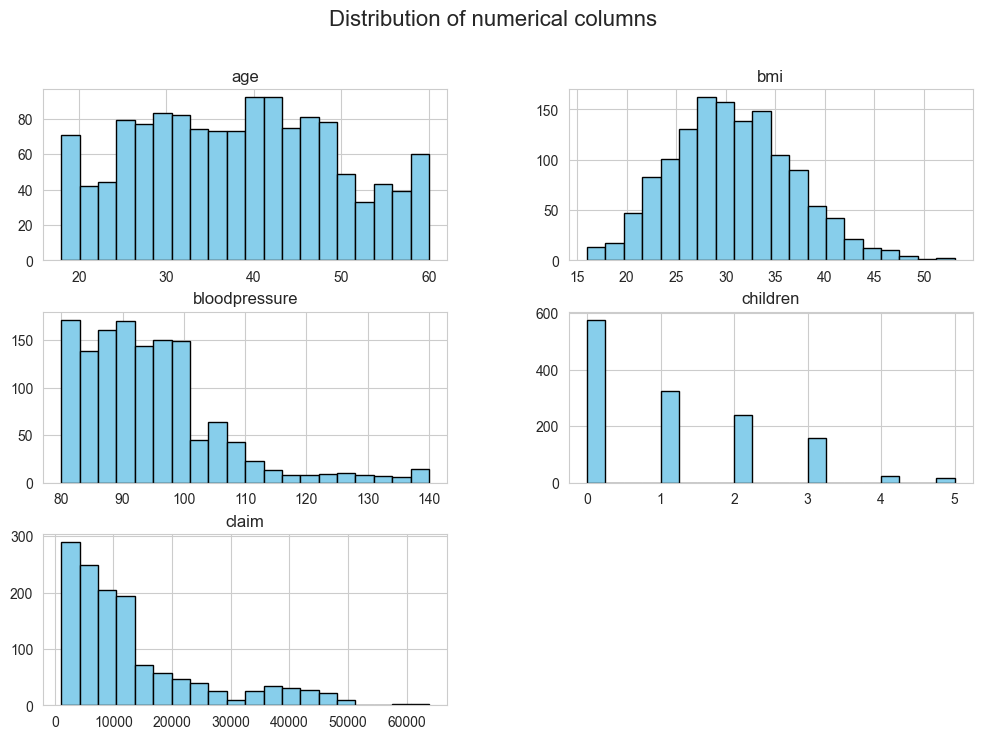

In [17]:
df[numerical_cols].hist(bins = 20, figsize=(12,8), color = "skyblue", edgecolor = "Black")
plt.suptitle("Distribution of numerical columns",fontsize = 16)
plt.show()

In [18]:
categorical_cols = df.select_dtypes(exclude=["int", "float"]).columns
categorical_cols

Index(['gender', 'diabetic', 'smoker', 'region'], dtype='object')

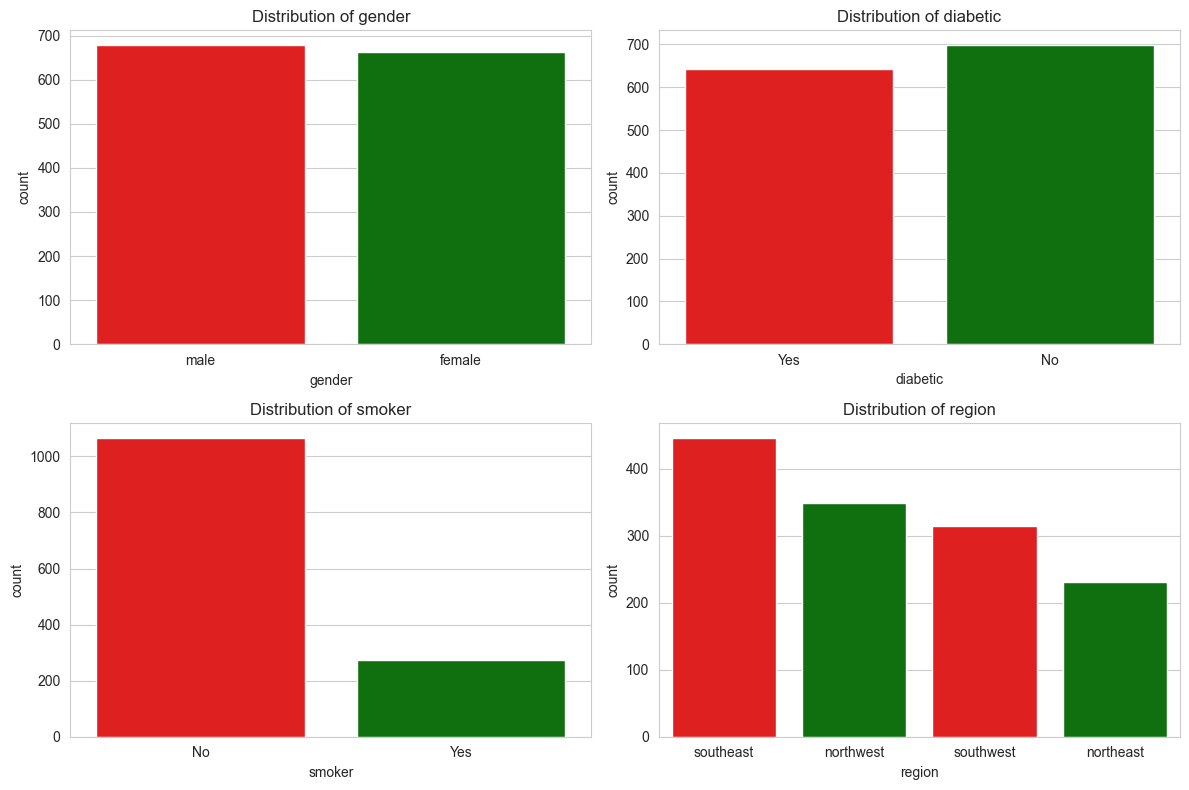

In [20]:
plt.figure(figsize=(12,8))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2,2,i)
    sns.countplot(data = df, x = df[col], palette=["red", "green"])
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.savefig("Distribution of categorical columns")
plt.show()

In [22]:
df.groupby(["gender", "smoker"])["claim"].mean().round(2)

gender  smoker
female  No        8762.30
        Yes      30679.00
male    No        8061.54
        Yes      33042.01
Name: claim, dtype: float64

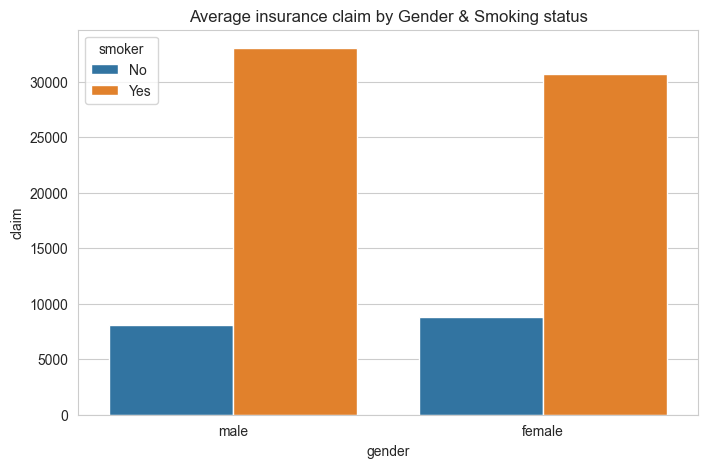

In [27]:
plt.figure(figsize=(8,5))
sns.barplot(data = df, x = "gender", y = "claim", hue = "smoker", estimator = "mean", errorbar="sd", ci = None)
plt.title("Average insurance claim by Gender & Smoking status")
plt.show()


In [31]:
pivot_region_diabetic = df.groupby(["region", "diabetic"])["claim"].mean().unstack()
pivot_region_diabetic

diabetic,No,Yes
region,,
northeast,16966.86,16818.30
northwest,11335.48,12083.74
southeast,13524.18,12419.20
southwest,13069.91,12313.74


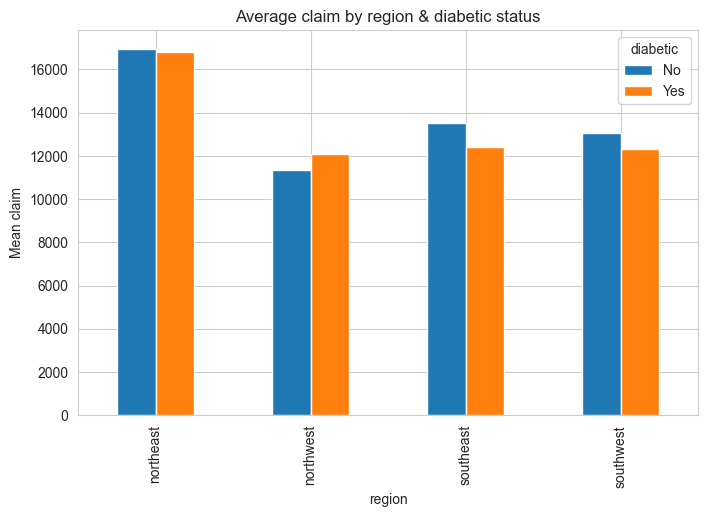

In [36]:
pivot_region_diabetic.plot(kind = "bar", figsize=(8,5))
plt.title("Average claim by region & diabetic status")
plt.ylabel("Mean claim")
plt.show()

In [37]:
pivot_table = pd.pivot_table(data = df, values="claim", index="region", columns="smoker", aggfunc="mean")
pivot_table

smoker,No,Yes
region,,
northeast,11666.11,29673.54
northwest,7980.83,30192.00
southeast,7374.07,34845.00
southwest,8294.75,32269.06


In [38]:
pd.pivot_table(df, values="claim", index = "children", columns="diabetic" ,aggfunc="mean")

diabetic,No,Yes
children,,
0,12846.24,11795.14
1,12730.46,12732.06
2,15567.77,14579.36
3,13807.61,17091.26
4,14106.63,13573.35
5,8519.04,9205.59


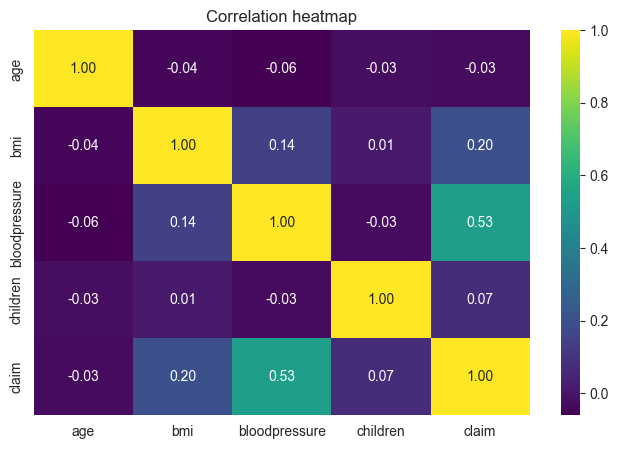

In [43]:
plt.figure(figsize=(8,5))
sns.heatmap(df[numerical_cols].corr(), annot = True, fmt = ".2f", cmap="viridis")
plt.title("Correlation heatmap")
plt.show()

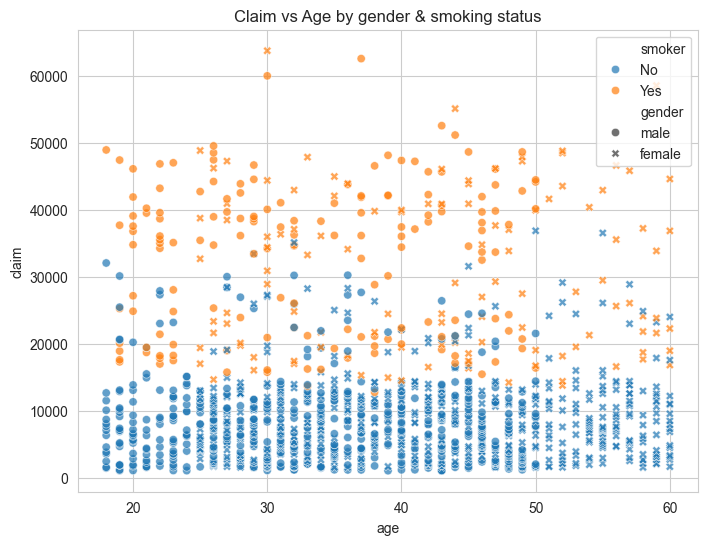

In [47]:
plt.figure(figsize=(8,6))
sns.scatterplot(data = df, x = "age", y = "claim", hue = "smoker", style="gender", alpha = 0.7)
plt.title("Claim vs Age by gender & smoking status")
plt.show()

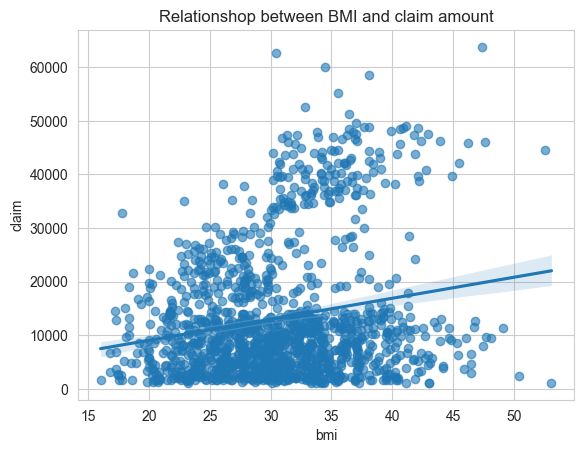

In [51]:
sns.regplot(data = df, x = "bmi", y = "claim", scatter_kws= {"alpha" : 0.6})
plt.title("Relationshop between BMI and claim amount")
plt.show()

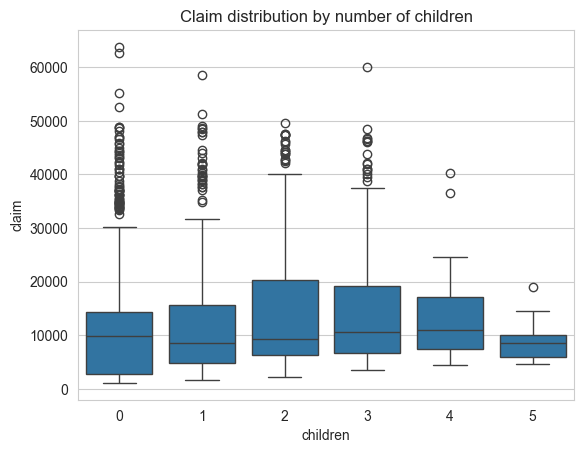

In [52]:
sns.boxplot(data = df, x = "children", y = "claim")
plt.title("Claim distribution by number of children")
plt.show()

In [ ]:
df["age_group"] = pd.cut(df["age"], bins = [0, 18, 30, 45, 60, 100], labels=["<18", "18-30", "31-45", "46-68", "60+"])

In [54]:
df.head()

,Id,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,age_group
0,1,39.00,male,23.20,91,Yes,0,No,southeast,1121.87,31-45
1,2,24.00,male,30.10,87,No,0,No,southeast,1131.51,18-30
2,3,43.00,male,33.30,82,Yes,0,No,southeast,1135.94,31-45
3,4,43.00,male,33.70,80,No,0,No,northwest,1136.40,31-45
4,5,43.00,male,34.10,100,No,0,No,northwest,1137.01,31-45


In [55]:
df['age_group'].value_counts()

age_group
31-45    561
46-68    383
18-30    380
<18       16
60+        0
Name: count, dtype: int64

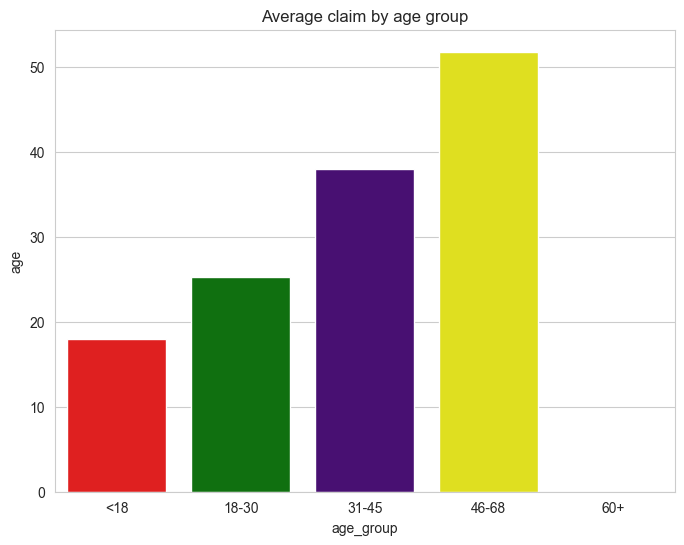

In [63]:
plt.figure(figsize=(8,6))
sns.barplot(df, x = "age_group", y = "age", estimator="mean", ci = None, palette=["red", "green", "indigo", "yellow"])
plt.title("Average claim by age group")
plt.show()

In [65]:
df["bmi_category"] = pd.cut(df["bmi"], bins = [0, 18.5, 24.9, 29.9, 100], labels = ["Underweight", "Normal", "Overweight", "Obese"])

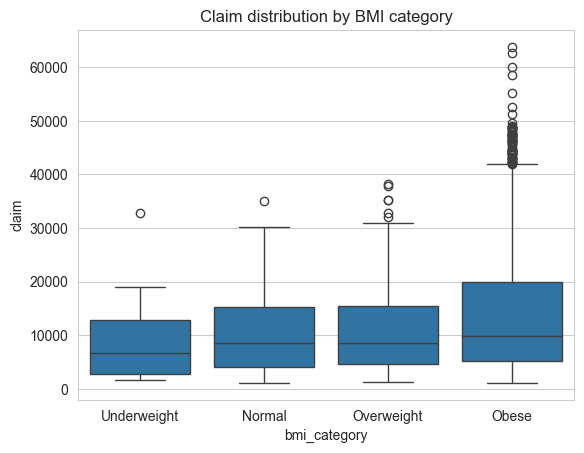

In [70]:
sns.boxplot(data = df, x = "bmi_category", y = "claim")
plt.title("Claim distribution by BMI category")
plt.show()